# 使用 Materials Project API 绘制一个 pourbaix 相图

In [11]:
# 若未安装依赖请使用如下命令
# !pip install pymatgen

In [12]:
# 导入相关的包
from pymatgen.analysis.pourbaix_diagram import PourbaixDiagram, PourbaixPlotter
from pymatgen.ext.matproj import MPRester

%matplotlib inline

# 初始化 MP Rester
mpr = MPRester()

为了提取构建Pourbaix相图所需的信息，请使用 MPRester.get_pourbaix_entries(LIST_OF_ENTRIES)包含像图中所含有的化学元素。 不必在列表中包含“O”和“H”，因为它们是自动添加的。

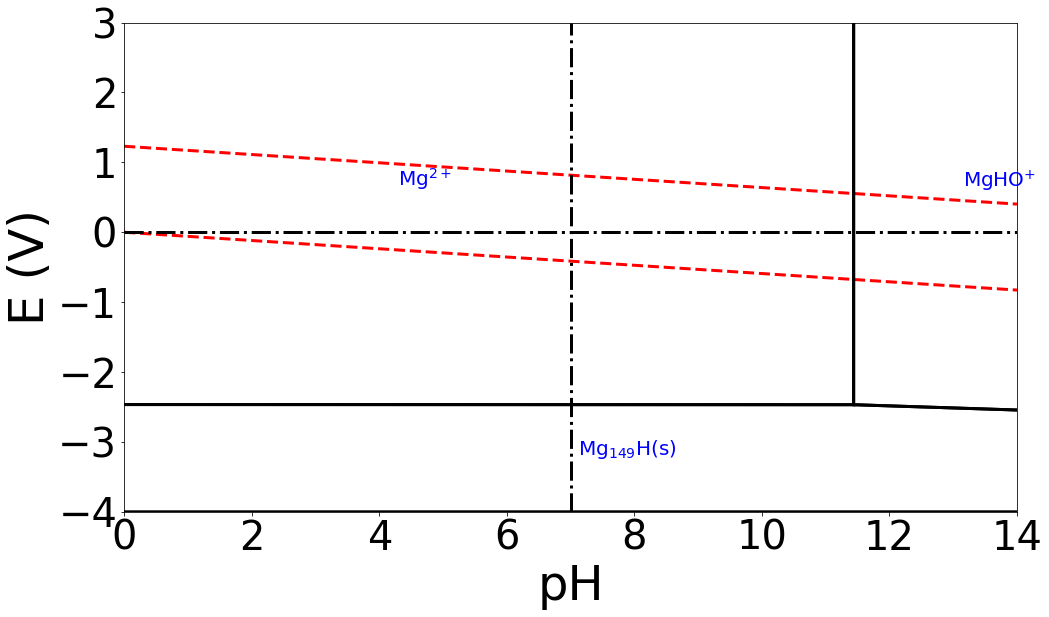

In [13]:
# 获得 Mg-O-H 体系所需要的entry
LIST_OF_ENTRIES = ["Mg"]
entries = mpr.get_pourbaix_entries(LIST_OF_ENTRIES)

# 构建 ourbaix相图对象
pbx = PourbaixDiagram(entries, filter_solids=True,conc_dict={"Mg": 1e-6})
plotter = PourbaixPlotter(pbx)
plotter.get_pourbaix_plot(limits=[[0,14],[-4,3]],label_domains=True).show()

PourbaixAnalyzer 包括许多有用的功能，用于确定相对于给定的 pourbaix 刻面的稳定物种和条目的稳定性（即作为 pH 和 V 的函数）。

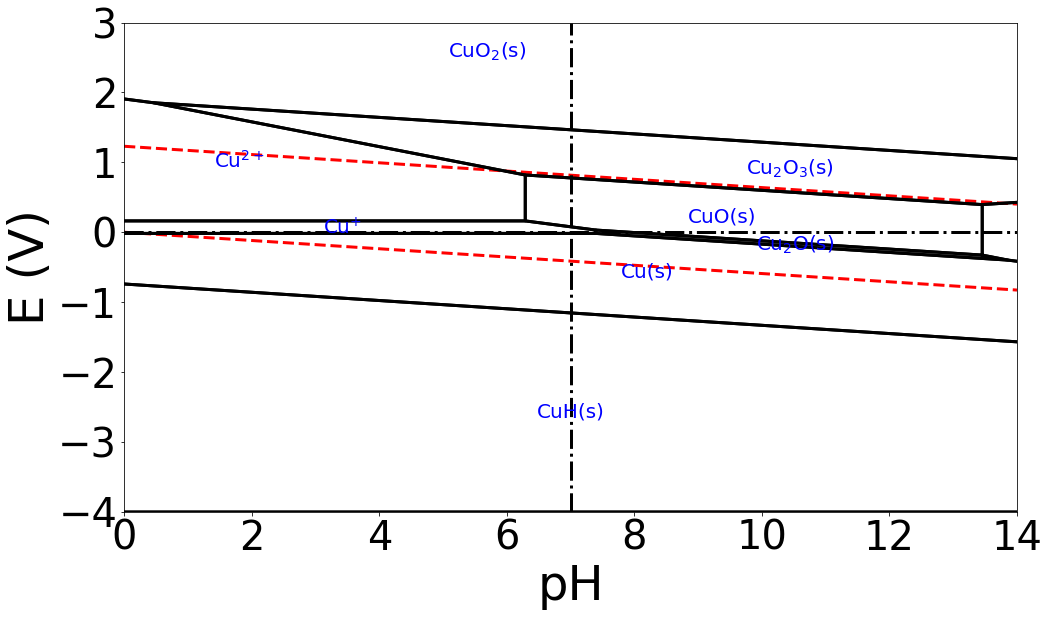

In [14]:

entries = mpr.get_pourbaix_entries(["Cu"])
pbx = PourbaixDiagram(entries, filter_solids=False)
plotter = PourbaixPlotter(pbx)
plotter.get_pourbaix_plot(limits=[[0,14],[-4,3]],label_domains=True).show()

CuO's potential energy per atom relative to the most stable decomposition product is 2.45 eV/atom


/opt/miniconda3/lib/python3.9/site-packages/pymatgen/analysis/pourbaix_diagram.py:1113: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(pH, V, stability, cmap=cmap, vmin=0, vmax=e_hull_max)


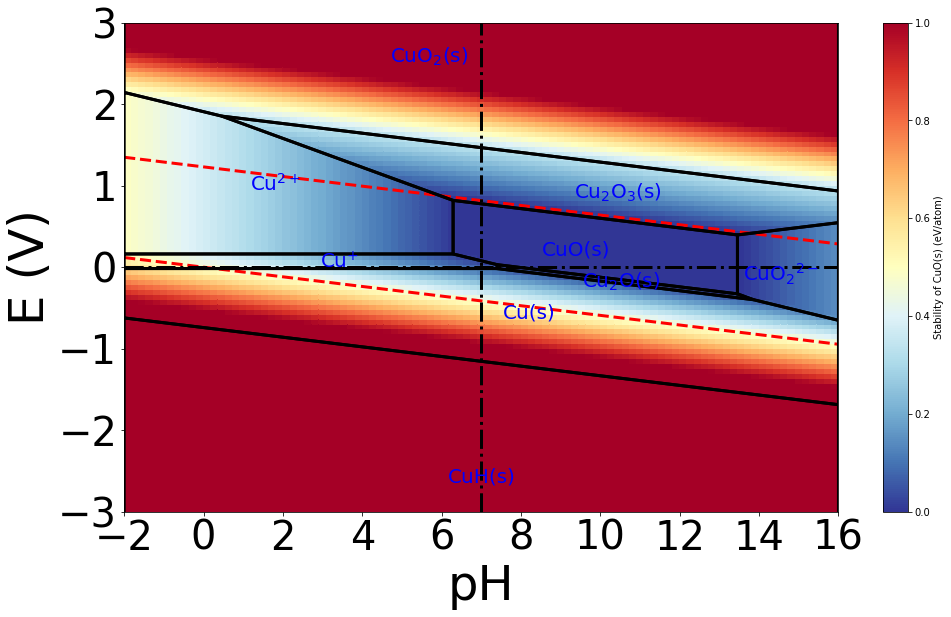

In [15]:
# mp-1692 是氧化铜的mp-id
# 更换不同的ph和V, 在get_decomposition_energy(entry, pH=7, V=-2)中, 可以计算出氧化铜在不同位置下的稳定性
entry = [e for e in entries if e.entry_id == "mp-1692"][0]
print(
    "CuO's potential energy per atom relative to the most",
    "stable decomposition product is {:0.2f} eV/atom".format(
        pbx.get_decomposition_energy(entry, pH=7, V=-2)
    ),
)

plt = plotter.plot_entry_stability(entry)
plt.show()

# 绘制 k 元体系
Pymatgen 还支持具有固定非 H 或 O 元素组成的二元/三元普贝图。 这是通过找到满足组合约束的所有可能的条目组合并将它们视为pourbaix空间中的单独条目来实现的。 请注意，您可以提供合成字典并进一步调整pourbaix 图。

In [16]:
# Get all pourbaix entries corresponding to the Bi-V-O-H chemical system.
entries = mpr.get_pourbaix_entries(["Bi", "V"])
# Construct the PourbaixDiagram object
pbx = PourbaixDiagram(
    entries,
    comp_dict={"Bi": 0.5, "V": 0.5},
    conc_dict={"Bi": 1e-8, "V": 1e-8},
    filter_solids=True,
)

  0%|          | 0/121 [00:00<?, ?it/s]

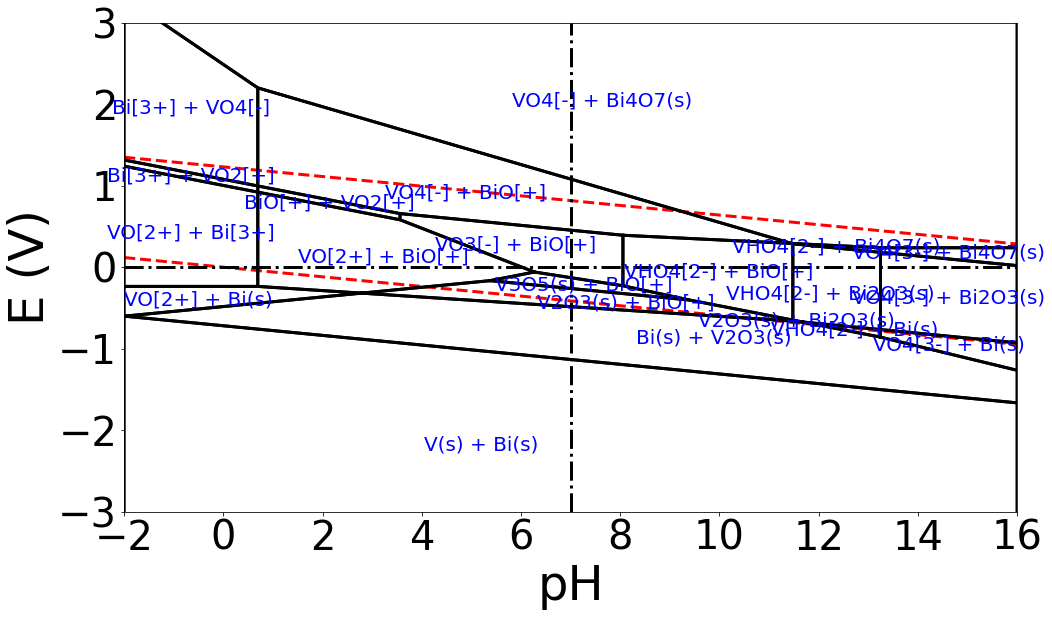

In [17]:
# Construct the pourbaix analyzer
plotter = PourbaixPlotter(pbx)
plt = plotter.get_pourbaix_plot()
plt.show()

在这些情况下获取实体条目的稳定性热图有点复杂，因为 pourbaix 图的许多区域都包含多相条目。 这是此案例的示例。

/opt/miniconda3/lib/python3.9/site-packages/pymatgen/analysis/pourbaix_diagram.py:1113: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(pH, V, stability, cmap=cmap, vmin=0, vmax=e_hull_max)


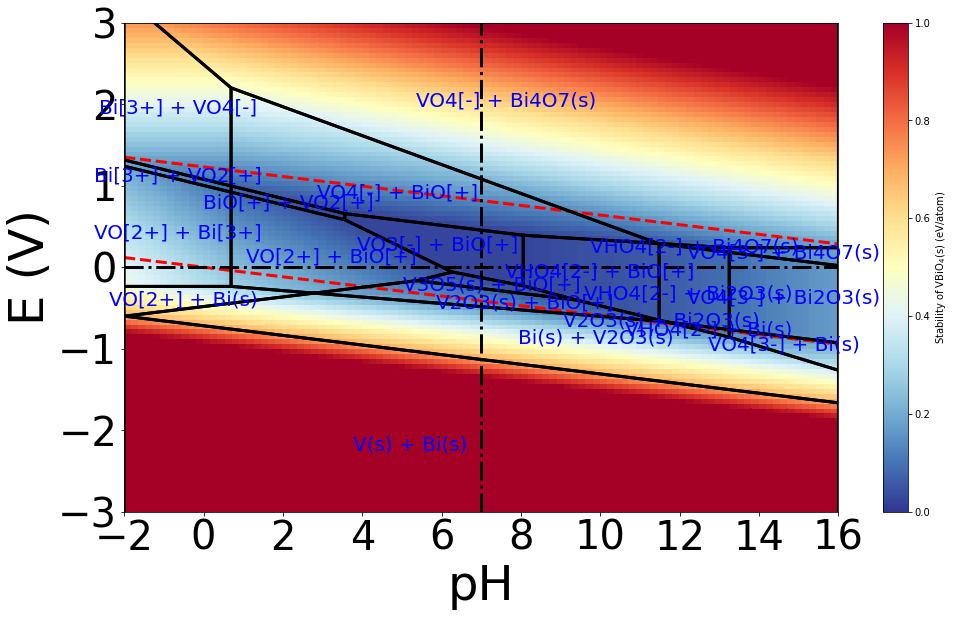

In [18]:
bivo4_entry = [entry for entry in entries if entry.entry_id == "mp-540864"][0]
plt = plotter.plot_entry_stability(bivo4_entry)

In [19]:
pbx.stable_entries

[Multiple Pourbaix Entry: energy = -1.0511, npH = -2.9999999999999982, nPhi = -2.9999999999999982, nH2O = 1.4999999999999991, entry_id = ['mp-18937', 'mp-23262'], species: V2O3(s) + Bi2O3(s),
 Multiple Pourbaix Entry: energy = -0.6822, npH = -4.499999999999995, nPhi = -3.9999999999999942, nH2O = 2.499999999999997, entry_id = ['ion-15', 'ion-1'], species: VHO4[2-] + BiO[+],
 Multiple Pourbaix Entry: energy = -0.3429, npH = -4.999999999999989, nPhi = -3.999999999999992, nH2O = 2.749999999999994, entry_id = ['ion-15', 'mp-23262'], species: VHO4[2-] + Bi2O3(s),
 Multiple Pourbaix Entry: energy = 0.5280, npH = -5.749999999999998, nPhi = -5.249999999999998, nH2O = 2.874999999999999, entry_id = ['ion-12', 'mp-30303'], species: VO4[-] + Bi4O7(s),
 Multiple Pourbaix Entry: energy = -1.3649, npH = -2.666666666666668, nPhi = -3.1666666666666683, nH2O = 1.333333333333334, entry_id = ['mp-1275946', 'ion-1'], species: V3O5(s) + BiO[+],
 Multiple Pourbaix Entry: energy = -0.0525, npH = -5.00000000000